In [127]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import random
from mpl_toolkits import mplot3d
import math

In [146]:
def createPlantedPartitionGraph(n,c,eps):
    G = nx.Graph()
    p_in = (2*c+eps)/(2*n)
    p_out = (2*c-eps)/(2*n)
    k = n//2
    for i in range(k):
        G.add_node(i)
        G.add_node(i+k)
        for j in range(k):
            if j>i:
                #connection between group 1
                if random.random()<p_in:
                    G.add_edge(i,j)
                #connection between group 2
                if random.random()<p_in:
                    G.add_edge(i+k,j+k)
            #connections between the 2 groups
            if random.random()<p_out:
                G.add_edge(i,j+k)
    return G

(0.912, 11)
(0.908, 15)
(0.896, 14)
(0.908, 12)
(0.88, 15)
(0.878, 13)
(0.896, 13)
(0.004, 3)
(0.882, 16)
(0.866, 13)
(0.456, 13)


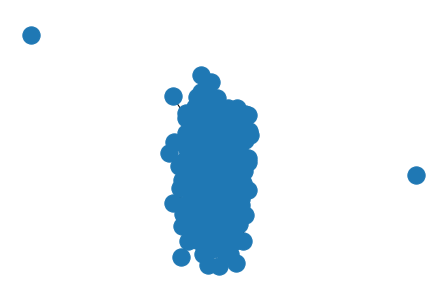

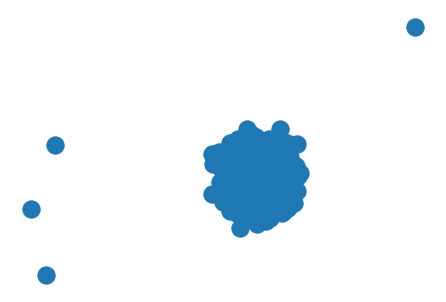

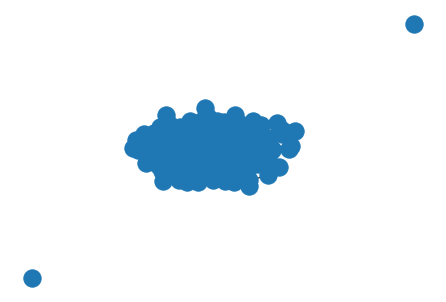

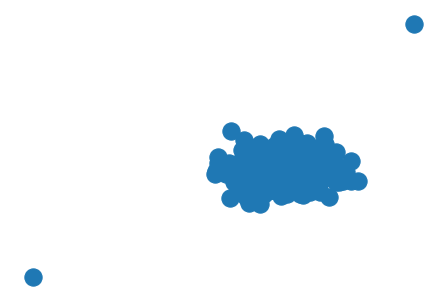

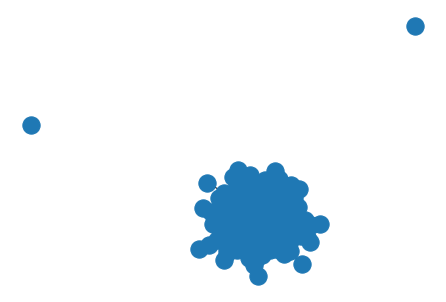

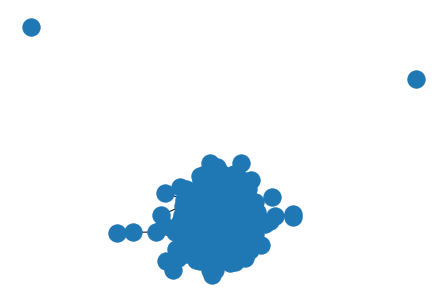

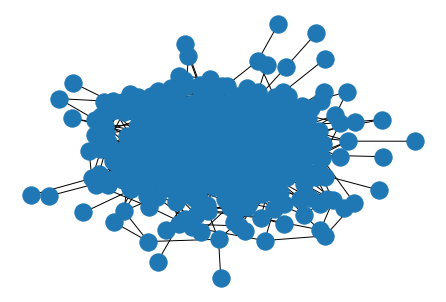

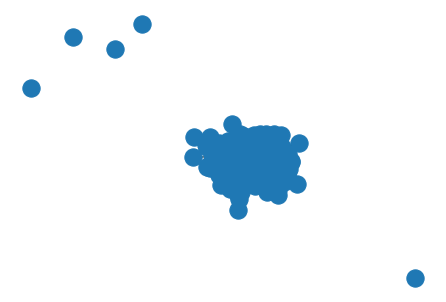

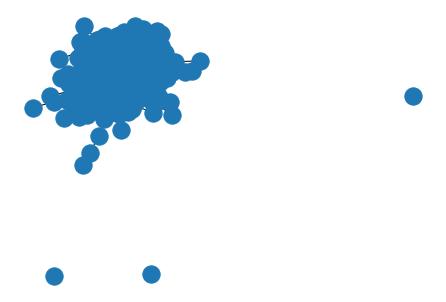

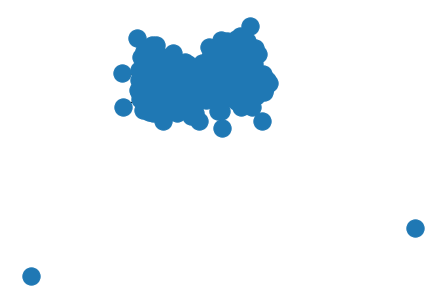

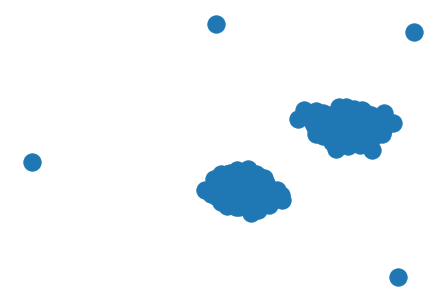

In [156]:
#PROBLEM 1a - visualizations
n = 500
c = 5
eps = [0,1,2,3,4,5,6,7,8,9,10]
p = 0.5
for e in eps:
    G = createPlantedPartitionGraph(n, c, e)
    print(spreadingProcess(G, p))
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw_spring(G)
    plt.draw()
    plt.axis('off')
    plt.savefig("eps"+str(e)+".png")

In [154]:
def spreadingProcess(G, p):
    #randomly infect one vertex
    infected = [random.choice(list(G.nodes))]
    index = 0
    t = 1
    #while new people are being infected
    while index < len(infected):
        #loop over the new infected people
        num_inf = len(infected)
        while index < num_inf:
            #infect their uninfected neighbors with prob p
            for node in G.neighbors(infected[index]):
                if not node in infected and random.random() <= p:
                    infected.append(node)
            index += 1
        t += 1
    return (len(infected)/len(G), t)

In [160]:
print(np.append(np.arange(0,3,1),np.arange(3,4,0.1)))

[0.  1.  2.  3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9]


In [135]:
#PROBLEM 1b - spreading visualization
n = 1000
c = 8
eps = 0
reps = 500
epid_size = []
epid_len = []
probs = np.arange(0,1,0.001)
for p in probs:
    size = 0
    length = 0
    print(p)
    for i in range(reps):
        G = createPlantedPartitionGraph(n,c,eps)
        (s,l) = spreadingProcess(G, p)
        size += s
        length += l
    epid_size.append(size/reps)
    epid_len.append(length/reps)
print(epid_size)
print(epid_len)

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.01
0.011
0.012
0.013000000000000001
0.014
0.015
0.016
0.017
0.018000000000000002
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026000000000000002
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036000000000000004
0.037
0.038
0.039
0.04
0.041
0.042
0.043000000000000003
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051000000000000004
0.052000000000000005
0.053
0.054
0.055
0.056
0.057
0.058
0.059000000000000004
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.07100000000000001
0.07200000000000001
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.08600000000000001
0.08700000000000001
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.10200000000000001
0.10300000000000001
0.10400000000000001
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.11800000000000001
0.11900000000000001
0.12
0.121
0.122
0.123
0.124
0.12

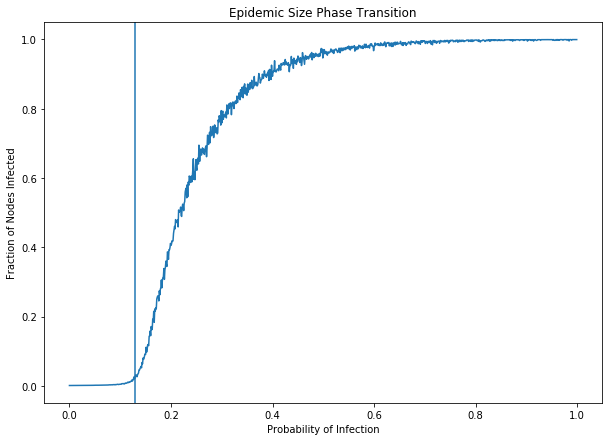

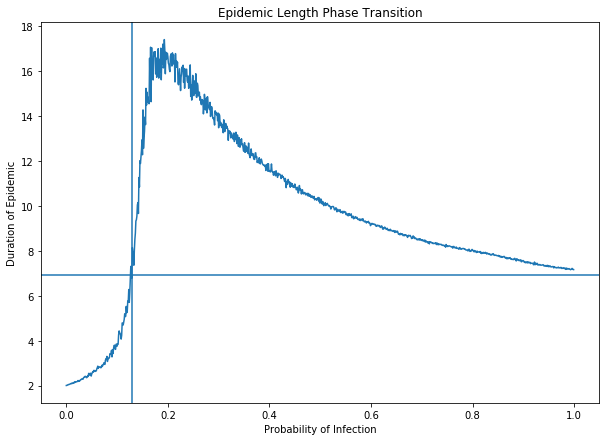

In [136]:
#plot size
plt.figure(figsize=(10,7))
plt.plot(probs, epid_size)
plt.axvline(0.13)
plt.title("Epidemic Size Phase Transition")
plt.xlabel("Probability of Infection")
plt.ylabel("Fraction of Nodes Infected")
plt.savefig("size.png")

#plot length
plt.figure(figsize=(10,7))
plt.plot(probs, epid_len)
plt.axhline(math.log(n))
plt.axvline(0.13)
plt.title("Epidemic Length Phase Transition")
plt.xlabel("Probability of Infection")
plt.ylabel("Duration of Epidemic")
plt.savefig("length.png")

probs_fig_1 = probs
epid_size_fig_1 = epid_size
epid_len_fig_1 = epid_len

In [184]:
#PROBLEM 1c - spreading visualization with community structure
n = 1000
c = 8
reps = 500
epid_size_2d = []
epid_len_2d = []
probs = np.arange(0,0.2,0.05)
eps = np.append(np.arange(0,2*c,1),np.arange(2*c-0.9,2*c+0.01,0.1))
print(eps)
for e in eps:
    epid_size = []
    epid_len = []
    for p in probs:
        size = 0
        length = 0
        print(str(p)+", "+str(e))
        for i in range(reps):
            G = createPlantedPartitionGraph(n,c,e)
            (s,l) = spreadingProcess(G, p)
            size += s
            length += l
        epid_size.append(size/reps)
        epid_len.append(length/reps)
    epid_size_2d.append(epid_size)
    epid_len_2d.append(epid_len)
print(epid_size_2d)
print(epid_len_2d)

[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16. ]
0.0, 0.0
0.05, 0.0
0.1, 0.0
0.15000000000000002, 0.0
0.0, 1.0
0.05, 1.0
0.1, 1.0
0.15000000000000002, 1.0
0.0, 2.0
0.05, 2.0
0.1, 2.0
0.15000000000000002, 2.0
0.0, 3.0
0.05, 3.0
0.1, 3.0
0.15000000000000002, 3.0
0.0, 4.0
0.05, 4.0
0.1, 4.0
0.15000000000000002, 4.0
0.0, 5.0
0.05, 5.0
0.1, 5.0
0.15000000000000002, 5.0
0.0, 6.0
0.05, 6.0
0.1, 6.0
0.15000000000000002, 6.0
0.0, 7.0
0.05, 7.0
0.1, 7.0
0.15000000000000002, 7.0
0.0, 8.0
0.05, 8.0
0.1, 8.0
0.15000000000000002, 8.0
0.0, 9.0
0.05, 9.0
0.1, 9.0
0.15000000000000002, 9.0
0.0, 10.0
0.05, 10.0
0.1, 10.0
0.15000000000000002, 10.0
0.0, 11.0
0.05, 11.0
0.1, 11.0
0.15000000000000002, 11.0
0.0, 12.0
0.05, 12.0
0.1, 12.0
0.15000000000000002, 12.0
0.0, 13.0
0.05, 13.0
0.1, 13.0
0.15000000000000002, 13.0
0.0, 14.0
0.05, 14.0
0.1, 14.0
0.15000000000000002, 14.0
0.0, 15.0
0.05, 15.0
0.1, 15.0
0.15000000000000002, 1

In [199]:
epid_size_start = [[0.0010000000000000007, 0.0017400000000000013, 0.004421999999999963, 0.09365599999999999], [0.0010000000000000007, 0.0017720000000000014, 0.004191999999999961, 0.106272], [0.0010000000000000007, 0.0016620000000000012, 0.005169999999999945, 0.09425000000000003], [0.0010000000000000007, 0.0017080000000000014, 0.004675999999999961, 0.08659600000000003], [0.0010000000000000007, 0.0017760000000000013, 0.004953999999999955, 0.09647599999999994], [0.0010000000000000007, 0.0017540000000000014, 0.005005999999999955, 0.097234], [0.0010000000000000007, 0.0016940000000000013, 0.004471999999999957, 0.10711399999999985], [0.0010000000000000007, 0.0016720000000000012, 0.0043419999999999535, 0.0949899999999999], [0.0010000000000000007, 0.0017060000000000014, 0.005075999999999954, 0.09970799999999974], [0.0010000000000000007, 0.0016760000000000013, 0.004833999999999954, 0.09751599999999984], [0.0010000000000000007, 0.0016020000000000012, 0.0055099999999999524, 0.08123599999999997], [0.0010000000000000007, 0.0016840000000000013, 0.004543999999999961, 0.10099199999999998], [0.0010000000000000007, 0.0016860000000000013, 0.004313999999999964, 0.08424800000000005], [0.0010000000000000007, 0.001570000000000001, 0.004431999999999965, 0.08755599999999997], [0.0010000000000000007, 0.0015720000000000011, 0.004725999999999961, 0.09649999999999989], [0.0010000000000000007, 0.0016620000000000012, 0.0054459999999999596, 0.07439600000000006], [0.0010000000000000007, 0.0015400000000000012, 0.004825999999999947, 0.07554799999999999], [0.0010000000000000007, 0.001526000000000001, 0.004877999999999949, 0.08187799999999995], [0.0010000000000000007, 0.0017900000000000014, 0.005037999999999956, 0.07939800000000001], [0.0010000000000000007, 0.0016360000000000012, 0.0044959999999999575, 0.08256999999999998], [0.0010000000000000007, 0.0015560000000000012, 0.004881999999999956, 0.07251], [0.0010000000000000007, 0.0016220000000000013, 0.004041999999999965, 0.07808400000000008], [0.0010000000000000007, 0.0015840000000000012, 0.004669999999999953, 0.07195200000000007], [0.0010000000000000007, 0.0017300000000000013, 0.004671999999999961, 0.062058000000000085], [0.0010000000000000007, 0.0015940000000000012, 0.004245999999999962, 0.062440000000000204], [0.0010000000000000007, 0.0017160000000000014, 0.004593999999999964, 0.059458000000000115]]
epid_len_start = [[2.0, 2.604, 3.888, 12.504], [2.0, 2.612, 3.63, 13.81], [2.0, 2.536, 4.068, 13.138], [2.0, 2.566, 3.864, 11.746], [2.0, 2.602, 4.01, 12.502], [2.0, 2.574, 3.968, 12.54], [2.0, 2.544, 3.73, 13.926], [2.0, 2.552, 3.712, 12.336], [2.0, 2.566, 3.99, 13.734], [2.0, 2.54, 3.882, 12.772], [2.0, 2.5, 4.132, 11.578], [2.0, 2.538, 3.754, 13.362], [2.0, 2.556, 3.712, 11.998], [2.0, 2.468, 3.824, 12.052], [2.0, 2.458, 3.982, 13.216], [2.0, 2.514, 4.01, 11.87], [2.0, 2.466, 3.994, 11.844], [2.0, 2.432, 3.95, 12.772], [2.0, 2.638, 3.98, 11.846], [2.0, 2.49, 3.84, 12.654], [2.0, 2.442, 3.9, 11.852], [2.0, 2.52, 3.68, 12.526], [2.0, 2.474, 3.798, 11.786], [2.0, 2.57, 4.024, 11.32], [2.0, 2.5, 3.766, 11.062], [2.0, 2.566, 3.91, 11.168]]
epid_size_2d = [[0.0010000000000000007, 0.004195999999999965, 0.41264400000000034, 0.7698439999999989, 0.9091260000000008, 0.9667780000000009, 0.9776280000000012, 0.9922640000000017, 0.9943540000000026, 0.997224000000003], [0.0010000000000000007, 0.004487999999999967, 0.40653600000000095, 0.7612319999999994, 0.9185340000000007, 0.9623600000000008, 0.983532000000002, 0.9882300000000006, 0.9943840000000032, 0.9972280000000029], [0.0010000000000000007, 0.004743999999999956, 0.3988680000000006, 0.7505740000000002, 0.9033979999999991, 0.9547040000000007, 0.9795880000000011, 0.9923500000000021, 0.9962820000000019, 0.9992500000000025], [0.0010000000000000007, 0.004459999999999959, 0.39483000000000057, 0.7746039999999997, 0.9055000000000001, 0.9703240000000014, 0.985730000000001, 0.9941460000000024, 0.998384000000003, 0.9992440000000027], [0.0010000000000000007, 0.004141999999999968, 0.4169540000000004, 0.7888979999999995, 0.8921839999999999, 0.9665100000000016, 0.9816780000000018, 0.9902920000000024, 0.998358000000003, 0.9992360000000022], [0.0010000000000000007, 0.004309999999999958, 0.40745200000000037, 0.7892039999999992, 0.9244759999999997, 0.9648640000000008, 0.9778820000000014, 0.9904620000000023, 0.9963720000000026, 0.9992700000000034], [0.0010000000000000007, 0.0047159999999999555, 0.4195240000000005, 0.7704579999999995, 0.9104280000000001, 0.9685960000000002, 0.9737060000000011, 0.9921220000000018, 0.9963800000000024, 0.9992800000000029], [0.0010000000000000007, 0.004843999999999957, 0.3757960000000004, 0.7816959999999994, 0.9091339999999994, 0.9623720000000012, 0.9838500000000011, 0.9921240000000012, 0.9964820000000035, 0.9993020000000036], [0.0010000000000000007, 0.004517999999999953, 0.3074440000000005, 0.7459839999999991, 0.8977739999999995, 0.9646520000000008, 0.9874920000000028, 0.9884980000000024, 0.9943900000000016, 0.9993000000000025], [0.0010000000000000007, 0.004533999999999958, 0.1998620000000001, 0.38182, 0.45304800000000023, 0.4775740000000004, 0.4899960000000016, 0.4962379999999991, 0.49719999999999837, 0.49860799999999894]]
epid_len_2d = [[2.0, 3.73, 18.0, 14.742, 12.588, 11.134, 10.066, 9.276, 8.776, 8.292], [2.0, 3.76, 17.952, 14.712, 12.864, 11.266, 10.144, 9.352, 8.806, 8.4], [2.0, 3.934, 18.204, 14.658, 12.67, 11.212, 10.162, 9.484, 8.92, 8.488], [2.0, 3.782, 18.224, 15.282, 12.87, 11.52, 10.378, 9.61, 9.028, 8.564], [2.0, 3.652, 18.962, 16.044, 12.982, 11.53, 10.418, 9.708, 9.118, 8.686], [2.0, 3.756, 19.438, 16.182, 13.606, 11.722, 10.584, 9.848, 9.236, 8.804], [2.0, 3.872, 20.728, 16.158, 13.636, 12.056, 10.8, 10.034, 9.406, 8.968], [2.0, 3.96, 19.44, 16.922, 14.142, 12.402, 11.204, 10.306, 9.664, 9.238], [2.0, 3.816, 17.962, 17.43, 14.898, 13.182, 11.884, 10.852, 10.204, 9.676], [2.0, 3.82, 14.474, 12.484, 10.666, 9.388, 8.554, 7.914, 7.372, 7.056]]
epid_size_fig_2 = [[0.0010000000000000007, 0.004731999999999959, 0.40568600000000055, 0.7805079999999996, 0.9010940000000007, 0.960662, 0.987664000000001, 0.9922420000000016, 0.9962680000000018, 0.9992620000000028], [0.0010000000000000007, 0.004899999999999951, 0.4185800000000006, 0.790594, 0.9145339999999998, 0.9668660000000009, 0.9875320000000017, 0.9922300000000029, 0.9982180000000027, 0.9932440000000027], [0.0010000000000000007, 0.004813999999999959, 0.4216500000000007, 0.7758979999999998, 0.9109840000000007, 0.9625000000000008, 0.9915580000000018, 0.9942760000000027, 0.9962480000000015, 0.9972220000000025], [0.0010000000000000007, 0.004095999999999961, 0.40440400000000043, 0.7695559999999997, 0.8992320000000006, 0.9681140000000005, 0.9873720000000021, 0.9904280000000029, 0.9983160000000032, 0.999248000000003], [0.0010000000000000007, 0.00414999999999996, 0.4173380000000007, 0.7786839999999986, 0.9091239999999996, 0.9607760000000002, 0.9698340000000016, 0.992496000000002, 0.9983480000000022, 0.9972840000000027], [0.0010000000000000007, 0.004733999999999962, 0.42530800000000035, 0.7628959999999999, 0.9104260000000002, 0.9684780000000014, 0.9875420000000011, 0.9962500000000021, 0.9923340000000029, 0.9992520000000029], [0.0010000000000000007, 0.005099999999999949, 0.41351600000000044, 0.7782979999999988, 0.8973380000000002, 0.9685520000000004, 0.9833440000000013, 0.9943560000000017, 0.9983340000000029, 0.9972900000000027], [0.0010000000000000007, 0.004479999999999959, 0.40923000000000037, 0.7467519999999995, 0.8981699999999994, 0.9547500000000018, 0.9736300000000017, 0.9922820000000028, 0.9983740000000036, 0.9972460000000026], [0.0010000000000000007, 0.004419999999999965, 0.40778200000000037, 0.7512399999999998, 0.915058, 0.964506000000001, 0.9856020000000008, 0.9942560000000025, 0.9963220000000023, 0.9992780000000033], [0.0010000000000000007, 0.004945999999999961, 0.4085540000000006, 0.7874500000000001, 0.893344, 0.9703500000000014, 0.9836400000000021, 0.9904280000000006, 0.996266000000002, 0.9972560000000028], [0.0010000000000000007, 0.004339999999999971, 0.4165640000000004, 0.7720039999999982, 0.9166259999999993, 0.9642960000000012, 0.9816140000000024, 0.9844360000000023, 0.9963340000000027, 0.997254000000002], [0.0010000000000000007, 0.004381999999999957, 0.43870600000000026, 0.7573659999999984, 0.8953879999999994, 0.9585680000000008, 0.9815820000000012, 0.9922600000000016, 0.9984020000000026, 0.9992700000000034], [0.0010000000000000007, 0.004427999999999963, 0.38217000000000056, 0.7790080000000005, 0.9051139999999996, 0.9528720000000006, 0.985604000000001, 0.9922280000000022, 0.9963180000000033, 0.9972400000000021], [0.0010000000000000007, 0.004979999999999952, 0.39950600000000047, 0.781643999999999, 0.9070699999999999, 0.9492320000000011, 0.9795420000000011, 0.9943100000000032, 0.9963960000000022, 0.9992240000000026], [0.0010000000000000007, 0.004687999999999957, 0.4250000000000004, 0.7854479999999999, 0.9201219999999991, 0.9629500000000012, 0.9855620000000006, 0.9903520000000018, 0.9924440000000035, 0.9973600000000034], [0.0010000000000000007, 0.004317999999999961, 0.4167300000000006, 0.7654959999999998, 0.9099239999999992, 0.9608200000000002, 0.9817580000000012, 0.9944100000000022, 0.9963960000000024, 0.9993140000000031]]
epid_len_fig_2 = [[2.0, 3.854, 16.342, 13.988, 11.472, 10.246, 9.242, 8.454, 7.984, 7.532], [2.0, 3.838, 16.626, 14.09, 11.714, 10.288, 9.188, 8.526, 7.978, 7.464], [2.0, 4.01, 16.76, 14.03, 11.632, 10.232, 9.232, 8.474, 8.006, 7.544], [2.0, 3.588, 16.228, 13.872, 11.618, 10.318, 9.24, 8.49, 8.022, 7.534], [2.0, 3.712, 16.544, 13.838, 11.63, 10.2, 9.112, 8.47, 7.982, 7.508], [2.0, 3.912, 16.898, 13.682, 11.638, 10.274, 9.258, 8.518, 7.942, 7.534], [2.0, 3.974, 16.69, 13.856, 11.596, 10.302, 9.262, 8.44, 8.002, 7.514], [2.0, 3.75, 16.716, 13.506, 11.486, 10.21, 9.164, 8.478, 8.024, 7.536], [2.0, 3.784, 16.462, 13.494, 11.788, 10.258, 9.278, 8.504, 7.988, 7.55], [2.0, 3.946, 16.48, 14.252, 11.522, 10.312, 9.262, 8.482, 7.984, 7.552], [2.0, 3.666, 16.854, 13.95, 11.73, 10.236, 9.21, 8.454, 8.018, 7.614], [2.0, 3.796, 17.748, 13.722, 11.504, 10.274, 9.264, 8.532, 8.076, 7.638], [2.0, 3.89, 15.924, 14.126, 11.71, 10.234, 9.368, 8.568, 8.098, 7.69], [2.0, 4.014, 16.452, 14.09, 11.902, 10.272, 9.368, 8.74, 8.162, 7.786], [2.0, 3.862, 17.864, 14.462, 12.164, 10.58, 9.576, 8.844, 8.33, 7.922], [2.0, 3.762, 18.076, 14.46, 12.518, 11.028, 9.968, 9.278, 8.702, 8.258]]

In [200]:
epid_size_fig_2 = [[0.0010000000000000007, 0.004731999999999959, 0.40568600000000055, 0.7805079999999996, 0.9010940000000007, 0.960662, 0.987664000000001, 0.9922420000000016, 0.9962680000000018, 0.9992620000000028], [0.0010000000000000007, 0.004899999999999951, 0.4185800000000006, 0.790594, 0.9145339999999998, 0.9668660000000009, 0.9875320000000017, 0.9922300000000029, 0.9982180000000027, 0.9932440000000027], [0.0010000000000000007, 0.004813999999999959, 0.4216500000000007, 0.7758979999999998, 0.9109840000000007, 0.9625000000000008, 0.9915580000000018, 0.9942760000000027, 0.9962480000000015, 0.9972220000000025], [0.0010000000000000007, 0.004095999999999961, 0.40440400000000043, 0.7695559999999997, 0.8992320000000006, 0.9681140000000005, 0.9873720000000021, 0.9904280000000029, 0.9983160000000032, 0.999248000000003], [0.0010000000000000007, 0.00414999999999996, 0.4173380000000007, 0.7786839999999986, 0.9091239999999996, 0.9607760000000002, 0.9698340000000016, 0.992496000000002, 0.9983480000000022, 0.9972840000000027], [0.0010000000000000007, 0.004733999999999962, 0.42530800000000035, 0.7628959999999999, 0.9104260000000002, 0.9684780000000014, 0.9875420000000011, 0.9962500000000021, 0.9923340000000029, 0.9992520000000029], [0.0010000000000000007, 0.005099999999999949, 0.41351600000000044, 0.7782979999999988, 0.8973380000000002, 0.9685520000000004, 0.9833440000000013, 0.9943560000000017, 0.9983340000000029, 0.9972900000000027], [0.0010000000000000007, 0.004479999999999959, 0.40923000000000037, 0.7467519999999995, 0.8981699999999994, 0.9547500000000018, 0.9736300000000017, 0.9922820000000028, 0.9983740000000036, 0.9972460000000026], [0.0010000000000000007, 0.004419999999999965, 0.40778200000000037, 0.7512399999999998, 0.915058, 0.964506000000001, 0.9856020000000008, 0.9942560000000025, 0.9963220000000023, 0.9992780000000033], [0.0010000000000000007, 0.004945999999999961, 0.4085540000000006, 0.7874500000000001, 0.893344, 0.9703500000000014, 0.9836400000000021, 0.9904280000000006, 0.996266000000002, 0.9972560000000028], [0.0010000000000000007, 0.004339999999999971, 0.4165640000000004, 0.7720039999999982, 0.9166259999999993, 0.9642960000000012, 0.9816140000000024, 0.9844360000000023, 0.9963340000000027, 0.997254000000002], [0.0010000000000000007, 0.004381999999999957, 0.43870600000000026, 0.7573659999999984, 0.8953879999999994, 0.9585680000000008, 0.9815820000000012, 0.9922600000000016, 0.9984020000000026, 0.9992700000000034], [0.0010000000000000007, 0.004427999999999963, 0.38217000000000056, 0.7790080000000005, 0.9051139999999996, 0.9528720000000006, 0.985604000000001, 0.9922280000000022, 0.9963180000000033, 0.9972400000000021], [0.0010000000000000007, 0.004979999999999952, 0.39950600000000047, 0.781643999999999, 0.9070699999999999, 0.9492320000000011, 0.9795420000000011, 0.9943100000000032, 0.9963960000000022, 0.9992240000000026], [0.0010000000000000007, 0.004687999999999957, 0.4250000000000004, 0.7854479999999999, 0.9201219999999991, 0.9629500000000012, 0.9855620000000006, 0.9903520000000018, 0.9924440000000035, 0.9973600000000034], [0.0010000000000000007, 0.004317999999999961, 0.4167300000000006, 0.7654959999999998, 0.9099239999999992, 0.9608200000000002, 0.9817580000000012, 0.9944100000000022, 0.9963960000000024, 0.9993140000000031], [0.0010000000000000007, 0.004195999999999965, 0.41264400000000034, 0.7698439999999989, 0.9091260000000008, 0.9667780000000009, 0.9776280000000012, 0.9922640000000017, 0.9943540000000026, 0.997224000000003], [0.0010000000000000007, 0.004487999999999967, 0.40653600000000095, 0.7612319999999994, 0.9185340000000007, 0.9623600000000008, 0.983532000000002, 0.9882300000000006, 0.9943840000000032, 0.9972280000000029], [0.0010000000000000007, 0.004743999999999956, 0.3988680000000006, 0.7505740000000002, 0.9033979999999991, 0.9547040000000007, 0.9795880000000011, 0.9923500000000021, 0.9962820000000019, 0.9992500000000025], [0.0010000000000000007, 0.004459999999999959, 0.39483000000000057, 0.7746039999999997, 0.9055000000000001, 0.9703240000000014, 0.985730000000001, 0.9941460000000024, 0.998384000000003, 0.9992440000000027], [0.0010000000000000007, 0.004141999999999968, 0.4169540000000004, 0.7888979999999995, 0.8921839999999999, 0.9665100000000016, 0.9816780000000018, 0.9902920000000024, 0.998358000000003, 0.9992360000000022], [0.0010000000000000007, 0.004309999999999958, 0.40745200000000037, 0.7892039999999992, 0.9244759999999997, 0.9648640000000008, 0.9778820000000014, 0.9904620000000023, 0.9963720000000026, 0.9992700000000034], [0.0010000000000000007, 0.0047159999999999555, 0.4195240000000005, 0.7704579999999995, 0.9104280000000001, 0.9685960000000002, 0.9737060000000011, 0.9921220000000018, 0.9963800000000024, 0.9992800000000029], [0.0010000000000000007, 0.004843999999999957, 0.3757960000000004, 0.7816959999999994, 0.9091339999999994, 0.9623720000000012, 0.9838500000000011, 0.9921240000000012, 0.9964820000000035, 0.9993020000000036], [0.0010000000000000007, 0.004517999999999953, 0.3074440000000005, 0.7459839999999991, 0.8977739999999995, 0.9646520000000008, 0.9874920000000028, 0.9884980000000024, 0.9943900000000016, 0.9993000000000025], [0.0010000000000000007, 0.004533999999999958, 0.1998620000000001, 0.38182, 0.45304800000000023, 0.4775740000000004, 0.4899960000000016, 0.4962379999999991, 0.49719999999999837, 0.49860799999999894]]
epid_len_fig_2 = [[2.0, 3.854, 16.342, 13.988, 11.472, 10.246, 9.242, 8.454, 7.984, 7.532], [2.0, 3.838, 16.626, 14.09, 11.714, 10.288, 9.188, 8.526, 7.978, 7.464], [2.0, 4.01, 16.76, 14.03, 11.632, 10.232, 9.232, 8.474, 8.006, 7.544], [2.0, 3.588, 16.228, 13.872, 11.618, 10.318, 9.24, 8.49, 8.022, 7.534], [2.0, 3.712, 16.544, 13.838, 11.63, 10.2, 9.112, 8.47, 7.982, 7.508], [2.0, 3.912, 16.898, 13.682, 11.638, 10.274, 9.258, 8.518, 7.942, 7.534], [2.0, 3.974, 16.69, 13.856, 11.596, 10.302, 9.262, 8.44, 8.002, 7.514], [2.0, 3.75, 16.716, 13.506, 11.486, 10.21, 9.164, 8.478, 8.024, 7.536], [2.0, 3.784, 16.462, 13.494, 11.788, 10.258, 9.278, 8.504, 7.988, 7.55], [2.0, 3.946, 16.48, 14.252, 11.522, 10.312, 9.262, 8.482, 7.984, 7.552], [2.0, 3.666, 16.854, 13.95, 11.73, 10.236, 9.21, 8.454, 8.018, 7.614], [2.0, 3.796, 17.748, 13.722, 11.504, 10.274, 9.264, 8.532, 8.076, 7.638], [2.0, 3.89, 15.924, 14.126, 11.71, 10.234, 9.368, 8.568, 8.098, 7.69], [2.0, 4.014, 16.452, 14.09, 11.902, 10.272, 9.368, 8.74, 8.162, 7.786], [2.0, 3.862, 17.864, 14.462, 12.164, 10.58, 9.576, 8.844, 8.33, 7.922], [2.0, 3.762, 18.076, 14.46, 12.518, 11.028, 9.968, 9.278, 8.702, 8.258], [2.0, 3.73, 18.0, 14.742, 12.588, 11.134, 10.066, 9.276, 8.776, 8.292], [2.0, 3.76, 17.952, 14.712, 12.864, 11.266, 10.144, 9.352, 8.806, 8.4], [2.0, 3.934, 18.204, 14.658, 12.67, 11.212, 10.162, 9.484, 8.92, 8.488], [2.0, 3.782, 18.224, 15.282, 12.87, 11.52, 10.378, 9.61, 9.028, 8.564], [2.0, 3.652, 18.962, 16.044, 12.982, 11.53, 10.418, 9.708, 9.118, 8.686], [2.0, 3.756, 19.438, 16.182, 13.606, 11.722, 10.584, 9.848, 9.236, 8.804], [2.0, 3.872, 20.728, 16.158, 13.636, 12.056, 10.8, 10.034, 9.406, 8.968], [2.0, 3.96, 19.44, 16.922, 14.142, 12.402, 11.204, 10.306, 9.664, 9.238], [2.0, 3.816, 17.962, 17.43, 14.898, 13.182, 11.884, 10.852, 10.204, 9.676], [2.0, 3.82, 14.474, 12.484, 10.666, 9.388, 8.554, 7.914, 7.372, 7.056]]

In [201]:
epid_len_final = []
for i in range(len(epid_len_fig_2)):
    epid_temp = epid_len_start[i]
    epid_temp.extend(epid_len_fig_2[i][2:])
    epid_len_final.append(epid_temp)
print(probs)
print(eps)
print(len(probs))
print(len(eps))
print(len(epid_len_final))
print(len(epid_len_final[0]))
print(epid_len_final)

[0.   0.05 0.1  0.15 0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9 ]
[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16. ]
12
26
26
12
[[2.0, 2.604, 3.888, 12.504, 16.342, 13.988, 11.472, 10.246, 9.242, 8.454, 7.984, 7.532], [2.0, 2.612, 3.63, 13.81, 16.626, 14.09, 11.714, 10.288, 9.188, 8.526, 7.978, 7.464], [2.0, 2.536, 4.068, 13.138, 16.76, 14.03, 11.632, 10.232, 9.232, 8.474, 8.006, 7.544], [2.0, 2.566, 3.864, 11.746, 16.228, 13.872, 11.618, 10.318, 9.24, 8.49, 8.022, 7.534], [2.0, 2.602, 4.01, 12.502, 16.544, 13.838, 11.63, 10.2, 9.112, 8.47, 7.982, 7.508], [2.0, 2.574, 3.968, 12.54, 16.898, 13.682, 11.638, 10.274, 9.258, 8.518, 7.942, 7.534], [2.0, 2.544, 3.73, 13.926, 16.69, 13.856, 11.596, 10.302, 9.262, 8.44, 8.002, 7.514], [2.0, 2.552, 3.712, 12.336, 16.716, 13.506, 11.486, 10.21, 9.164, 8.478, 8.024, 7.536], [2.0, 2.566, 3.99, 13.734, 16.462, 13.494, 11.788, 10.258, 9.278, 8.504, 7.988, 7.55], [2.0, 2.54,

In [194]:
probs = np.append(np.arange(0,0.2,0.05), np.arange(0.2,1,0.1))
epid_size_final = []
for i in range(len(epid_size_fig_2)):
    epid_temp = epid_size_start[i]
    epid_temp.extend(epid_size_fig_2[i][2:])
    epid_size_final.append(epid_temp)
print(probs)
print(eps)
print(len(probs))
print(len(eps))
print(len(epid_size_final))
print(len(epid_size_final[0]))
print(epid_size_final)

[0.   0.05 0.1  0.15 0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9 ]
[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16. ]
12
26
26
12
[[0.0010000000000000007, 0.0017400000000000013, 0.004421999999999963, 0.09365599999999999, 0.40568600000000055, 0.7805079999999996, 0.9010940000000007, 0.960662, 0.987664000000001, 0.9922420000000016, 0.9962680000000018, 0.9992620000000028], [0.0010000000000000007, 0.0017720000000000014, 0.004191999999999961, 0.106272, 0.4185800000000006, 0.790594, 0.9145339999999998, 0.9668660000000009, 0.9875320000000017, 0.9922300000000029, 0.9982180000000027, 0.9932440000000027], [0.0010000000000000007, 0.0016620000000000012, 0.005169999999999945, 0.09425000000000003, 0.4216500000000007, 0.7758979999999998, 0.9109840000000007, 0.9625000000000008, 0.9915580000000018, 0.9942760000000027, 0.9962480000000015, 0.9972220000000025], [0.0010000000000000007, 0.0017080000000000014, 0.004675999999999961, 0.

In [177]:
probs = np.arange(0,1,0.1)
eps = np.append(np.arange(0,2*c,1),np.arange(2*c-0.9,2*c+0.01,0.1))
epid_size_fig_2.extend(epid_size_2d)
epid_len_fig_2.extend(epid_len_2d)
print(len(eps))
print(eps)
print(epid_size_fig_2)
print(epid_len_fig_2)

26
[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16. ]
[[0.0010000000000000007, 0.004731999999999959, 0.40568600000000055, 0.7805079999999996, 0.9010940000000007, 0.960662, 0.987664000000001, 0.9922420000000016, 0.9962680000000018, 0.9992620000000028], [0.0010000000000000007, 0.004899999999999951, 0.4185800000000006, 0.790594, 0.9145339999999998, 0.9668660000000009, 0.9875320000000017, 0.9922300000000029, 0.9982180000000027, 0.9932440000000027], [0.0010000000000000007, 0.004813999999999959, 0.4216500000000007, 0.7758979999999998, 0.9109840000000007, 0.9625000000000008, 0.9915580000000018, 0.9942760000000027, 0.9962480000000015, 0.9972220000000025], [0.0010000000000000007, 0.004095999999999961, 0.40440400000000043, 0.7695559999999997, 0.8992320000000006, 0.9681140000000005, 0.9873720000000021, 0.9904280000000029, 0.9983160000000032, 0.999248000000003], [0.0010000000000000007, 0.00414999999999996, 0.417338000

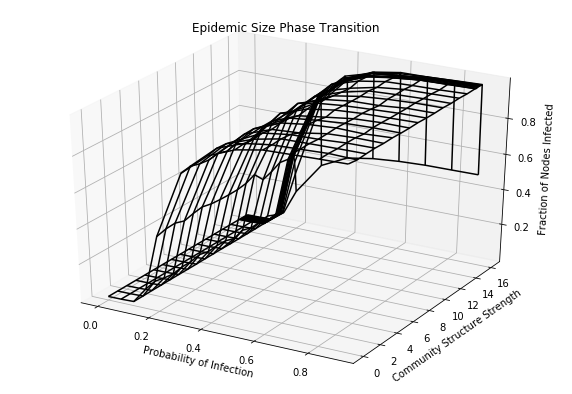

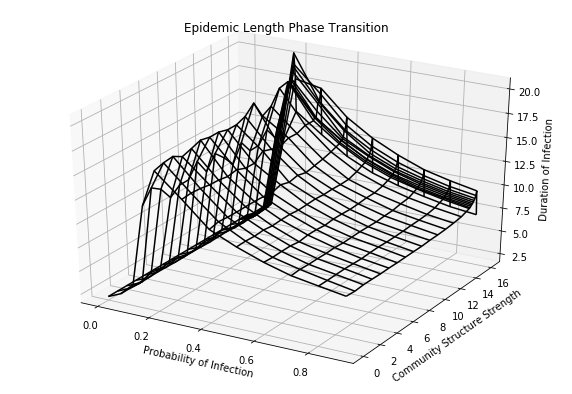

In [203]:
#plot epidemic size
X, Y = np.meshgrid(probs,eps)
fig = plt.figure(figsize=(10,7)) 
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(epid_size_final), color='black')
#ax.plot_surface(X, Y, np.asarray(epid_size_2d), rstride=1, cstride=1,
 #               cmap='viridis', edgecolor='none')
ax.set_title("Epidemic Size Phase Transition")
ax.set_xlabel("Probability of Infection")
ax.set_ylabel("Community Structure Strength")
ax.set_zlabel("Fraction of Nodes Infected")
plt.savefig("size_2d.png")

#plot epidemic length 
X, Y = np.meshgrid(probs,eps)
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(epid_len_final), color='black')
#ax.plot_surface(X, Y, np.asarray(epid_len_2d), rstride=1, cstride=1,
#               cmap='viridis', edgecolor='none')
ax.set_title("Epidemic Length Phase Transition")
ax.set_xlabel("Probability of Infection")
ax.set_ylabel("Community Structure Strength")
ax.set_zlabel("Duration of Infection")
plt.savefig("length_2d.png")

In [161]:
X_fig_2 = X
Y_fig_2 = Y
epid_size_fig_2 = epid_size_2d
epid_len_fig_2 = epid_len_2d
print(X_fig_2)
print(Y_fig_2)
print(epid_size_fig_2)
print(epid_len_fig_2)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]]
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9 

In [99]:
def latticeGraph(n):
    G = nx.Graph()
    for r in range(n):
        for c in range(n):
            if r>0:
                G.add_edge(n*(r-1)+c, n*r+c)
            if r<n-1:
                G.add_edge(n*(r+1)+c, n*r+c)
            if c>0:
                G.add_edge(n*r+c-1, n*r+c)
            if c<n-1:
                G.add_edge(n*r+c+1, n*r+c)
    return G

(-1.0884148216212282,
 1.0912294537597624,
 -1.1068902251974837,
 1.131830352792568)

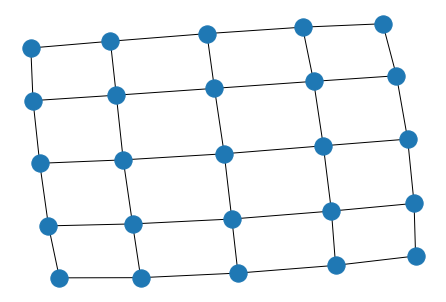

In [100]:
n = 50
G = latticeGraph(n)
plt.figure()
nx.draw_spring(G)
plt.draw()
plt.axis('off')

In [102]:
#PROBLEM 2a - spreading visualization lattice
n = 50
G = latticeGraph(n)
reps = 100
epid_size = []
epid_len = []
probs = np.arange(0,1,0.005)
for p in probs:
    size = 0
    length = 0
    print(p)
    for i in range(reps):
        (s,l) = spreadingProcess(G, p)
        size += s
        length += l
    epid_size.append(size/reps)
    epid_len.append(length/reps)
print(epid_size)
print(epid_len)

0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095
0.1
0.105
0.11
0.115
0.12
0.125
0.13
0.135
0.14
0.145
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18
0.185
0.19
0.195
0.2
0.20500000000000002
0.21
0.215
0.22
0.225
0.23
0.23500000000000001
0.24
0.245
0.25
0.255
0.26
0.265
0.27
0.275
0.28
0.28500000000000003
0.29
0.295
0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.34500000000000003
0.35000000000000003
0.355
0.36
0.365
0.37
0.375
0.38
0.385
0.39
0.395
0.4
0.405
0.41000000000000003
0.41500000000000004
0.42
0.425
0.43
0.435
0.44
0.445
0.45
0.455
0.46
0.465
0.47000000000000003
0.47500000000000003
0.48
0.485
0.49
0.495
0.5
0.505
0.51
0.515
0.52
0.525
0.53
0.535
0.54
0.545
0.55
0.555
0.56
0.5650000000000001
0.5700000000000001
0.5750000000000001
0.58
0.585
0.59
0.595
0.6
0.605
0.61
0.615
0.62
0.625
0.63
0.635
0.64
0.645
0.65
0.655
0.66
0.665
0.67
0.675
0.68
0.685
0.6900000000000001
0.6950000000000001
0.7000000000000001
0.705
0.

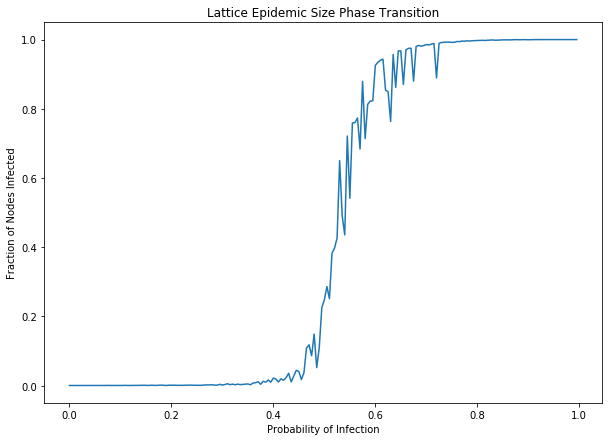

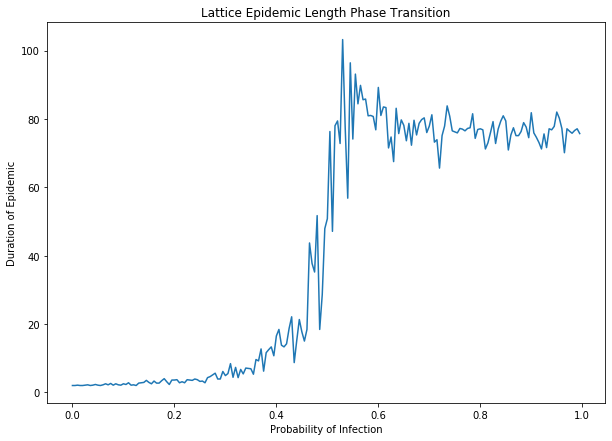

In [103]:
#plot size
plt.figure(figsize=(10,7))
plt.plot(probs, epid_size)
plt.title("Lattice Epidemic Size Phase Transition")
plt.xlabel("Probability of Infection")
plt.ylabel("Fraction of Nodes Infected")
plt.savefig("lattice_size.png")

#plot length
plt.figure(figsize=(10,7))
plt.plot(probs, epid_len)
plt.title("Lattice Epidemic Length Phase Transition")
plt.xlabel("Probability of Infection")
plt.ylabel("Duration of Epidemic")
plt.savefig("lattice_length.png")

In [104]:
def longRangeLatticeGraph(n,q):
    G = nx.Graph()
    for r in range(n):
        for c in range(n):
            if r>0:
                G.add_edge(n*(r-1)+c, n*r+c)
            if r<n-1:
                G.add_edge(n*(r+1)+c, n*r+c)
            if c>0:
                G.add_edge(n*r+c-1, n*r+c)
            if c<n-1:
                G.add_edge(n*r+c+1, n*r+c)
            #long range edges
            for r2 in range(r+1,n):
                for c2 in range(c+1,n):
                    if r2-r + c2-c >5 and random.random()<q:
                        G.add_edge(n*r+c, n*r2+c2)
    return G

(-0.6431124040486077,
 0.6512417999243741,
 -1.1295095146922638,
 1.1329074618161288)

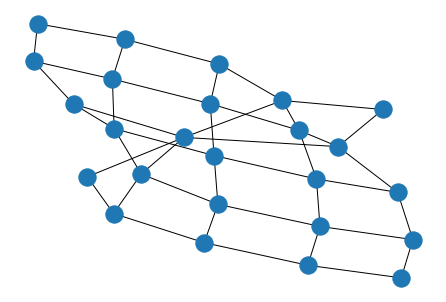

In [111]:
n = 5
q = 0.1
G = longRangeLatticeGraph(n,q)
plt.figure()
nx.draw_spring(G)
plt.draw()
plt.axis('off')

In [ ]:
#PROBLEM 2b - spreading visualization with long range lattice
n = 50
reps = 10
epid_size_2d = []
epid_len_2d = []
probs = np.arange(0,1.01,0.1)
q = np.arange(0,1.01,0.1)
for q_val in q:
    epid_size = []
    epid_len = []
    for p in probs:
        size = 0
        length = 0
        print(str(p)+", "+str(q_val))
        G = longRangeLatticeGraph(n,q_val)
        for i in range(reps):
            (s,l) = spreadingProcess(G, p)
            size += s
            length += l
        epid_size.append(size/reps)
        epid_len.append(length/reps)
    epid_size_2d.append(epid_size)
    epid_len_2d.append(epid_len)
print(epid_size_2d)
print(epid_len_2d)

0.0, 0.0
0.1, 0.0
0.2, 0.0
0.30000000000000004, 0.0
0.4, 0.0
0.5, 0.0
0.6000000000000001, 0.0
0.7000000000000001, 0.0
0.8, 0.0
0.9, 0.0
1.0, 0.0
0.0, 0.1
0.1, 0.1
0.2, 0.1
0.30000000000000004, 0.1
0.4, 0.1
0.5, 0.1
0.6000000000000001, 0.1
0.7000000000000001, 0.1
0.8, 0.1
0.9, 0.1
1.0, 0.1
0.0, 0.2
0.1, 0.2
0.2, 0.2
0.30000000000000004, 0.2
0.4, 0.2
0.5, 0.2
0.6000000000000001, 0.2
0.7000000000000001, 0.2
0.8, 0.2
0.9, 0.2
1.0, 0.2
0.0, 0.30000000000000004
0.1, 0.30000000000000004
0.2, 0.30000000000000004
0.30000000000000004, 0.30000000000000004
0.4, 0.30000000000000004
0.5, 0.30000000000000004
0.6000000000000001, 0.30000000000000004
0.7000000000000001, 0.30000000000000004
0.8, 0.30000000000000004
0.9, 0.30000000000000004
1.0, 0.30000000000000004
0.0, 0.4
0.1, 0.4
0.2, 0.4
0.30000000000000004, 0.4
0.4, 0.4
0.5, 0.4
0.6000000000000001, 0.4
0.7000000000000001, 0.4
0.8, 0.4
0.9, 0.4
1.0, 0.4
0.0, 0.5
0.1, 0.5
0.2, 0.5
0.30000000000000004, 0.5
0.4, 0.5
0.5, 0.5
0.6000000000000001, 0.5
0.700

In [206]:
print(epid_size_2d)
print(epid_len_2d)

[[0.0004, 0.000504, 0.000712, 0.0008639999999999998, 0.0008719999999999996, 0.0017119999999999995, 0.002688, 0.004448000000000001, 0.011336000000000002, 0.028047999999999997, 0.267976, 0.7169920000000001, 0.8148719999999998, 0.9080640000000001, 0.9827519999999998, 0.992992, 0.9972639999999998, 0.9989280000000003, 0.9998160000000003, 0.9999760000000001], [0.0004, 0.7660079999999997, 0.9636239999999998, 0.9933760000000003, 0.9962400000000001, 0.9777839999999999, 0.9985599999999996, 0.9989760000000003, 0.9993040000000001, 0.9994080000000003, 0.9996880000000005, 0.9998240000000002, 0.9998000000000004, 0.9999120000000002, 0.9998720000000002, 0.9999520000000001, 0.9999440000000002, 0.999992, 0.9999760000000001, 1.0], [0.0004, 0.9802479999999999, 0.9953360000000003, 0.9977279999999996, 0.9985439999999999, 0.9989999999999999, 0.9992640000000005, 0.9994640000000006, 0.9996160000000002, 0.9996880000000001, 0.9997520000000003, 0.9998320000000003, 0.9998160000000003, 0.999912, 0.9999280000000002, 

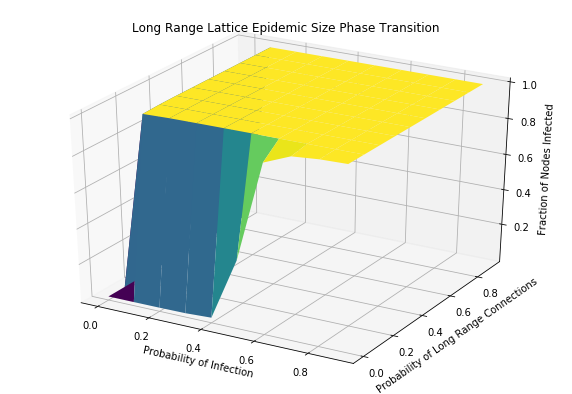

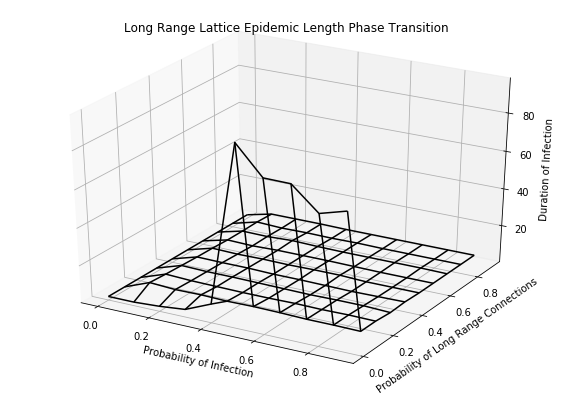

In [121]:
#plot epidemic size
X, Y = np.meshgrid(probs,q)
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(epid_size_2d), color='black')
#ax.plot_surface(X, Y, np.asarray(epid_size_2d), rstride=1, cstride=1,
#                cmap='viridis', edgecolor='none')
ax.set_title("Long Range Lattice Epidemic Size Phase Transition")
ax.set_xlabel("Probability of Infection")
ax.set_ylabel("Probability of Long Range Connections")
ax.set_zlabel("Fraction of Nodes Infected")
plt.savefig("lattice_size_2d.png")

#plot epidemic length
X, Y = np.meshgrid(probs,q)
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, np.asarray(epid_len_2d), color='black')
#ax.contour3D(X, Y, np.asarray(epid_len_2d), 50, cmap='binary')
#ax.plot_surface(X, Y, np.asarray(epid_len_2d), rstride=1, cstride=1,
#                cmap='viridis', edgecolor='none')
ax.set_title("Long Range Lattice Epidemic Length Phase Transition")
ax.set_xlabel("Probability of Infection")
ax.set_ylabel("Probability of Long Range Connections")
ax.set_zlabel("Duration of Infection")
plt.savefig("lattice_length_2d.png")